In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [6]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [7]:
mnist.train.images.shape

(55000, 784)

In [14]:
sample = mnist.train.images[22].reshape(28,28)

In [15]:
import matplotlib.pyplot as plt

In [16]:
%matplotlib inline

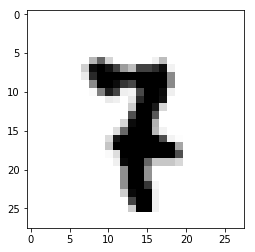

In [57]:
# sampling our data to visualize it
plt.imshow(sample,cmap='Greys')

In [18]:
# defining variables
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [27]:
n_classes = 10
n_samples = mnist.train.num_examples

In [21]:
n_input = 784 # flattened 28 * 28 matrix

In [23]:
n_hidden_1 = 256 #neurons per hidden layer in layer 1
n_hidden_2 = 256 #neurons per hidden layer in layer 2

In [58]:
# our multi_later fn
def multilayer_perceptron(x, weights, biases):
    '''
    x: Placeholder for Data Input
    weights: Dict of weights
    biases: dict of bias values
    '''
    
    # First Hidden Layer with RELU Activation 
    # x * W + B
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # func (x *W + B) = RELU -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden Layer with RELU Activation 
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Output layer
    out_layer = tf.matmul(layer_2, weights['out'] + biases['out'])
    
    return out_layer


In [66]:
#randomly generated weights and biases
weights = {
    'h1':tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [52]:
weights

{'h1': <tf.Variable 'Variable_20:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_21:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_22:0' shape=(256, 10) dtype=float32_ref>}

In [53]:
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [54]:
x = tf.placeholder('float', (None, n_input))

In [55]:
y = tf.placeholder('float', (None, n_classes))

In [62]:
pred = multilayer_perceptron(x, weights,biases)

In [65]:
# define cost and optimization fns
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)